In [1]:
# Importando bibliotecas necessárias
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# MNIST dataset
mnist = keras.datasets.mnist

# Definindo número de épocas
epochs = 10
batch_size = 128
# Definindo tamanho das imagens
img_rows, img_cols = 28, 28
img_shape = (img_rows, img_cols)

# Carregando imagens
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Definindo informações das classes
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = 10

In [3]:
train_images.shape

(60000, 28, 28)

In [88]:
# Reshape no conjunto de dados de acordo com o modelo das imagens configurado no keras
if keras.backend.image_data_format() == 'channels_first':
    train_images = train_images.reshape(train_images.shape[0], 1, img_rows, img_cols)
    test_images = test_images.reshape(test_images.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
    test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('x_train shape:', train_images.shape)
print(train_images.shape[0], 'train samples')
print(train_labels.shape[0], 'test samples')

# Convertendo os labels de entrada e saída para dummy values
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

# Normalizando valores das imagens entre zero e um.
train_images = train_images / 255.0
test_images = test_images / 255.0

x_train shape: (60000, 28, 28, 1)
60000 train samples
60000 test samples


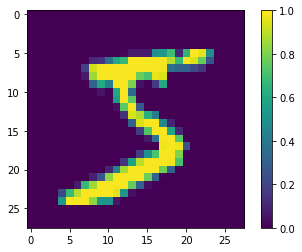

In [89]:
# Plotando imagem exemplo do conjunto de dados MNIST
plt.figure()
plt.imshow(train_images[0].reshape(img_shape))
plt.colorbar()
plt.grid(False)

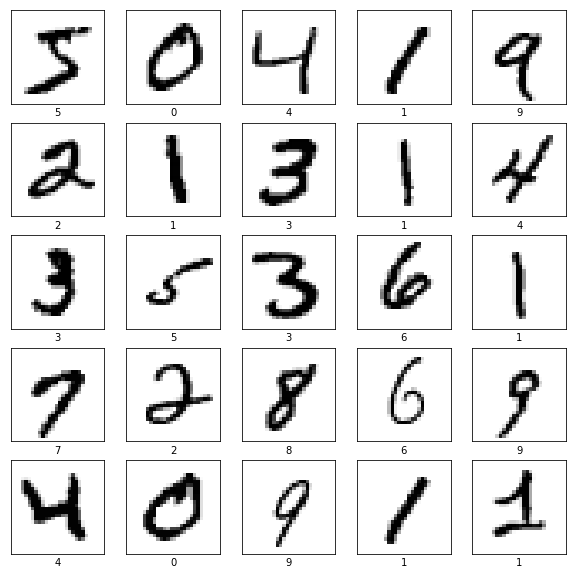

In [90]:
# Imprimindo as 25 primeiras imagens do conjunto de teste que serão usadas para uma avaliação visual do conjunto

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(img_shape), cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(train_labels[i])])

In [4]:
train_images.shape

(60000, 28, 28)

In [6]:
# Tutorial básico do Keras

print('Basic Neural Network')
model = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shape),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
#           validation_data=(test_images, test_labels)
         )

test_loss, test_acc = model.evaluate(test_images, test_labels)
 
print('Test accuracy:', test_acc)

Basic Neural Network
Epoch 1/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.3530 - acc: 0.9026
Epoch 2/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.1725 - acc: 0.9505
Epoch 3/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.1273 - acc: 0.9636
Epoch 4/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.1010 - acc: 0.9714
Epoch 5/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0833 - acc: 0.9765
Epoch 6/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0713 - acc: 0.9793
Epoch 7/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0615 - acc: 0.9830
Epoch 8/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0546 - acc: 0.9849
Epoch 9/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.0481 - acc: 0.9864
Epoch 10/10
10000/10000 [==============================] - 1s 71us/step
Test 

In [7]:
# Colocando uma camada convolucional
print('Simple Convolutional Neural Network with 32 filters of size (3, 3) in convolutional layer')
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
#           validation_data=(test_images, test_labels)
         )

test_loss, test_acc = model.evaluate(test_images, test_labels)
 
print('Test accuracy:', test_acc)

Simple Convolutional Neural Network with 32 filters of size (3, 3) in convolutional layer
Epoch 1/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.2941 - acc: 0.9148
Epoch 2/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.1068 - acc: 0.9708
Epoch 3/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.0751 - acc: 0.9787
Epoch 4/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0613 - acc: 0.9827
Epoch 5/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0527 - acc: 0.9847
Epoch 6/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.0460 - acc: 0.9868
Epoch 7/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0412 - acc: 0.9883
Epoch 8/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0371 - acc: 0.9896
Epoch 9/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.0337 - acc: 0.9906


In [8]:
# Alterando quantidade de mapas de caractéristcas na camada convolucional
print('Simple Convolutional Neural Network with 64 filters of size (3, 3) in convolutional layer')
model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
#           validation_data=(test_images, test_labels)
         )

test_loss, test_acc = model.evaluate(test_images, test_labels)
 
print('Test accuracy:', test_acc)

Simple Convolutional Neural Network with 64 filters of size (3, 3) in convolutional layer
Epoch 1/10
60000/60000 [==============================] - 13s 222us/step - loss: 0.2644 - acc: 0.9226
Epoch 2/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.0896 - acc: 0.9742
Epoch 3/10
60000/60000 [==============================] - 13s 225us/step - loss: 0.0657 - acc: 0.9808
Epoch 4/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.0535 - acc: 0.9846
Epoch 5/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.0455 - acc: 0.9870
Epoch 6/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.0403 - acc: 0.9882
Epoch 7/10
60000/60000 [==============================] - 14s 230us/step - loss: 0.0351 - acc: 0.9899
Epoch 8/10
60000/60000 [==============================] - 14s 241us/step - loss: 0.0322 - acc: 0.9908
Epoch 9/10
60000/60000 [==============================] - 14s 238us/step - loss: 0.0284 - acc:

In [9]:
# Modificando o tamanho dos filtros na camada convolucional
print('Simple Convolutional Neural Network with 32 filters of size (6,6) in convolutional layer')
model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=(6, 6), activation='relu', input_shape=input_shape),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
#           validation_data=(test_images, test_labels)
         )

test_loss, test_acc = model.evaluate(test_images, test_labels)
 
print('Test accuracy:', test_acc)

Simple Convolutional Neural Network with 32 filters of size (6,6) in convolutional layer
Epoch 1/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.1935 - acc: 0.9419
Epoch 2/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0668 - acc: 0.9802
Epoch 3/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.0487 - acc: 0.9856
Epoch 4/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.0392 - acc: 0.9879
Epoch 5/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.0332 - acc: 0.9899
Epoch 6/10
60000/60000 [==============================] - 12s 207us/step - loss: 0.0275 - acc: 0.9917
Epoch 7/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.0231 - acc: 0.9931
Epoch 8/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.0196 - acc: 0.9944
Epoch 9/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0169 - acc: 

In [10]:
# Adicionando uma camada totalmente conectada uma camada convolucional
print('Simple Convolutional Neural Network with one dense layer')
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
#           validation_data=(test_images, test_labels)
         )

test_loss, test_acc = model.evaluate(test_images, test_labels)
 
print('Test accuracy:', test_acc)

Simple Convolutional Neural Network with one dense layer
Epoch 1/10
60000/60000 [==============================] - 19s 312us/step - loss: 0.2523 - acc: 0.9226
Epoch 2/10
60000/60000 [==============================] - 18s 303us/step - loss: 0.0735 - acc: 0.9782
Epoch 3/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.0438 - acc: 0.9870
Epoch 4/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.0295 - acc: 0.9915
Epoch 5/10
60000/60000 [==============================] - 18s 296us/step - loss: 0.0197 - acc: 0.9945
Epoch 6/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.0136 - acc: 0.9962
Epoch 7/10
60000/60000 [==============================] - 18s 294us/step - loss: 0.0089 - acc: 0.9978
Epoch 8/10
60000/60000 [==============================] - 18s 295us/step - loss: 0.0055 - acc: 0.9989
Epoch 9/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.0036 - acc: 0.9994
Epoch 10/10
10000/10000 [

In [8]:
print('Convolutional Neural Network')
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
#           validation_data=(test_images, test_labels)
         )

test_loss, test_acc = model.evaluate(test_images, test_labels)
 
print('Test accuracy:', test_acc)


Convolutional Neural Network
Epoch 1/10
60000/60000 [==============================] - 29s 481us/step - loss: 0.2693 - acc: 0.9166
Epoch 2/10
60000/60000 [==============================] - 23s 385us/step - loss: 0.0921 - acc: 0.9728
Epoch 3/10
60000/60000 [==============================] - 23s 385us/step - loss: 0.0663 - acc: 0.9806
Epoch 4/10
60000/60000 [==============================] - 23s 384us/step - loss: 0.0552 - acc: 0.9827
Epoch 5/10
60000/60000 [==============================] - 23s 384us/step - loss: 0.0472 - acc: 0.9855
Epoch 6/10
60000/60000 [==============================] - 23s 384us/step - loss: 0.0405 - acc: 0.9875
Epoch 7/10
60000/60000 [==============================] - 23s 384us/step - loss: 0.0369 - acc: 0.9891
Epoch 8/10
60000/60000 [==============================] - 23s 385us/step - loss: 0.0327 - acc: 0.9896
Epoch 9/10
60000/60000 [==============================] - 23s 384us/step - loss: 0.0303 - acc: 0.9905
Epoch 10/10
10000/10000 [============================

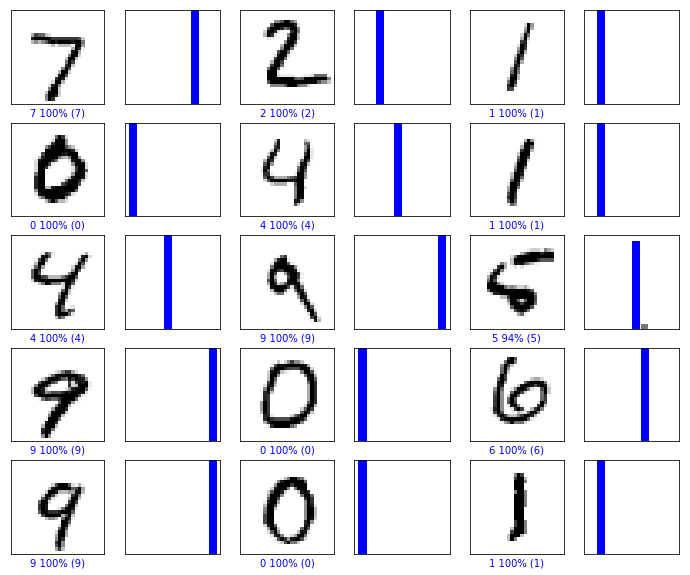

In [114]:
# Definindo funções para o plot das imagens e sua classificação de forma visual
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    true_label = np.argmax(true_label)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape(img_shape), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    true_label = np.argmax(true_label)
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

predictions = model.predict(test_images)  
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

# Inferencia das imagens escritas a mão

In [125]:
from PIL import Image

images = [None]*10
for i in range(len(images)):
    images[i] = Image.open("data/" + str(i) + ".jpg")
    images[i] = images[i].convert('L')
    images[i] = images[i].resize(size=(28,28))


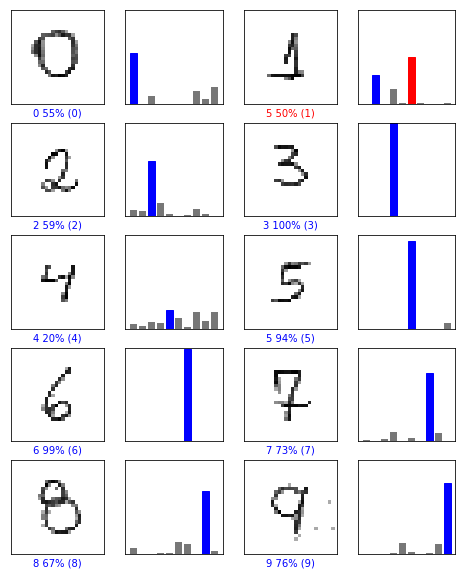

In [126]:
inf_test_images = []
for img in images:
    img = np.array(np.invert(img)).reshape(input_shape).astype('float32') / 255.0
    img[img < 0.3] = 0
    inf_test_images.append(img)
    
inf_test_labels = keras.utils.to_categorical(np.arange(10), num_classes)
inf_test_images = np.array(inf_test_images)

inf_predictions = model.predict(inf_test_images)  
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, inf_predictions, inf_test_labels, inf_test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, inf_predictions, inf_test_labels)